<a href="https://colab.research.google.com/github/Preethikuppuri/Preethikuppuri/blob/main/LR_MODELLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intercept: -0.010609073203456276
Coefficients: [6.19051742e-01 3.79897059e-01 9.12685483e-11]
Mean Squared Error: 0.01957716722396497
R² Score: 0.9987525264207477


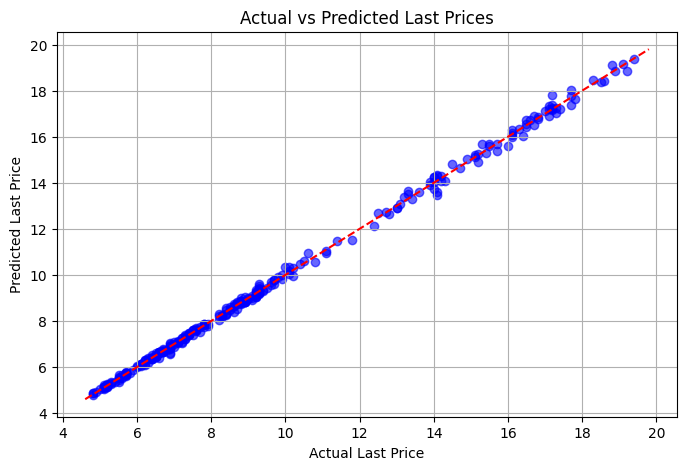

Predicted Last Price for sample input: 13.367062483254855
Model saved as linear_regression_model.pkl


In [5]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # For saving the model

# Step 2: Load the dataset
df = pd.read_csv('/content/Cleaned Data - cleanThy.csv')

# Step 3: Clean Volume column
df['Volume'] = df['Volume'].str.replace(',', '')         # Remove commas
df['Volume'] = df['Volume'].str.replace('M', '')         # Remove 'M'
df['Volume'] = df['Volume'].astype(float) * 1_000_000     # Convert to number

# Step 4: Define features and target
X = df[['Lowest Price', 'Highest Price', 'Volume']]
y = df['Last Price']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions & Evaluation
y_pred = model.predict(X_test)
intercept = model.intercept_
coefficients = model.coef_
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Intercept:", intercept)
print("Coefficients:", coefficients)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Step 8: Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual Last Price')
plt.ylabel('Predicted Last Price')
plt.title('Actual vs Predicted Last Prices')
plt.grid(True)
plt.show()

# Step 9: Predict for New Data (example)
sample_input = pd.DataFrame({
    'Lowest Price': [13.2],
    'Highest Price': [13.5],
    'Volume': [850_000_000]
})
sample_prediction = model.predict(sample_input)
print("Predicted Last Price for sample input:", sample_prediction[0])

# Step 10: Save the model
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as linear_regression_model.pkl")


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Step 2: Load the dataset
df = pd.read_csv("/Cleaned Data - cleanThy.csv")

# Step 3: Clean and preprocess the data
# The 'Volume' column contains values like "1,234M", we need to clean this and convert it to a number
df['Volume'] = df['Volume'].str.replace(',', '')      # Remove comma (e.g., '1,234M' -> '1234M')
df['Volume'] = df['Volume'].str.replace('M', '')      # Remove 'M'
df['Volume'] = df['Volume'].astype(float) * 1_000_000 # Convert to number (e.g., 1234 -> 1234000000)

# Optional: Convert the date to a numerical value (not used in model but useful if you want time features later)
df['Date_Encoded'] = pd.factorize(df['Date'])[0] + 1


In [3]:
# Step 4: Select Features (X) and Target (y)

# We want to predict 'Last Price' using:
# - Lowest Price
# - Highest Price
# - Volume

X = df[['Lowest Price', 'Highest Price', 'Volume']]
y = df['Last Price']


In [4]:
# Step 5: Split the data into training and testing sets

# 80% of the data will be used to train the model
# 20% will be used to test how well it performs on new, unseen data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Learn from training data


LinearRegression()

In [7]:
# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)


In [8]:
# Step 8: Evaluate the model

# Mean Squared Error (lower is better)
mse = mean_squared_error(y_test, y_pred)

# R² Score (closer to 1 is better)
r2 = r2_score(y_test, y_pred)

print("📈 Model Evaluation:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


📈 Model Evaluation:
Intercept: -0.010609073203456276
Coefficients: [6.19051742e-01 3.79897059e-01 9.12685483e-11]
Mean Squared Error (MSE): 0.01957716722396497
R² Score: 0.9987525264207477


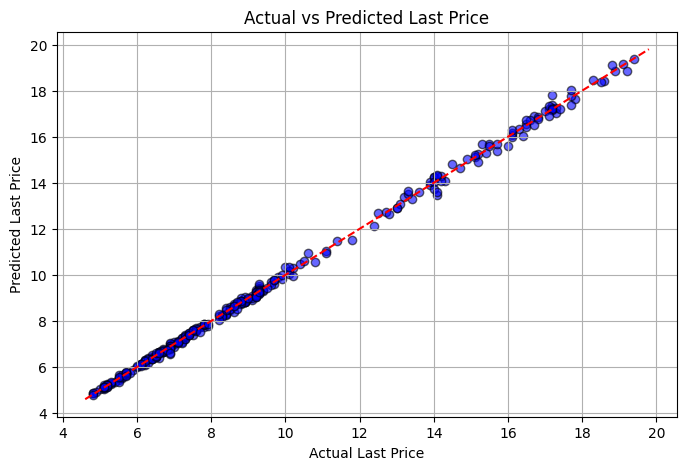

In [9]:
# Step 9: Plot Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Ideal prediction line
plt.xlabel("Actual Last Price")
plt.ylabel("Predicted Last Price")
plt.title("Actual vs Predicted Last Price")
plt.grid(True)
plt.show()


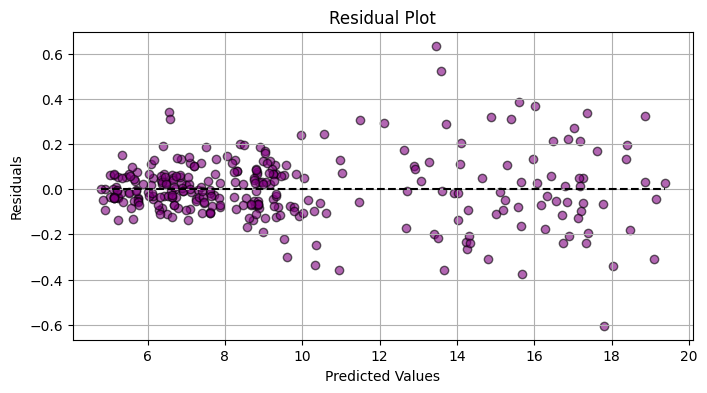

In [10]:
# Step 10: Plot residuals (difference between actual and predicted)
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='black', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
